In [1]:
test_results = '/home/art/Documents/repos/coding/lua/rnn/'

In [2]:
%matplotlib inline
import os

import torchfile

import matplotlib as mpl
from matplotlib import style
import matplotlib.pyplot as plt
style.use('dark_background')
import numpy as np

def discrete_cmap(N=6, base_cmap='Greens'):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N+1))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

fixation_cmap = discrete_cmap()

In [50]:
# get data
outputs_path = os.path.join(test_results, 'outputs.t7')
outputs = torchfile.load(outputs_path)

locs = np.asarray(outputs[b'locations'])
locs = np.swapaxes(locs, 0, 1)

targets_path = os.path.join(test_results, 'targets.t7')
targets = torchfile.load(targets_path)[b'targets']
true_lbl = (targets - 1).astype(int)

In [51]:
image_size = 28
unit_pixels = 13

fix = np.round(locs * unit_pixels + (image_size / 2))

In [52]:
fixes_by_digit = {}
digits = range(10)
for digit in digits:
    digit_inds = np.where(true_lbl == digit)[0]
    fixes_by_digit[digit] = fix[digit_inds]

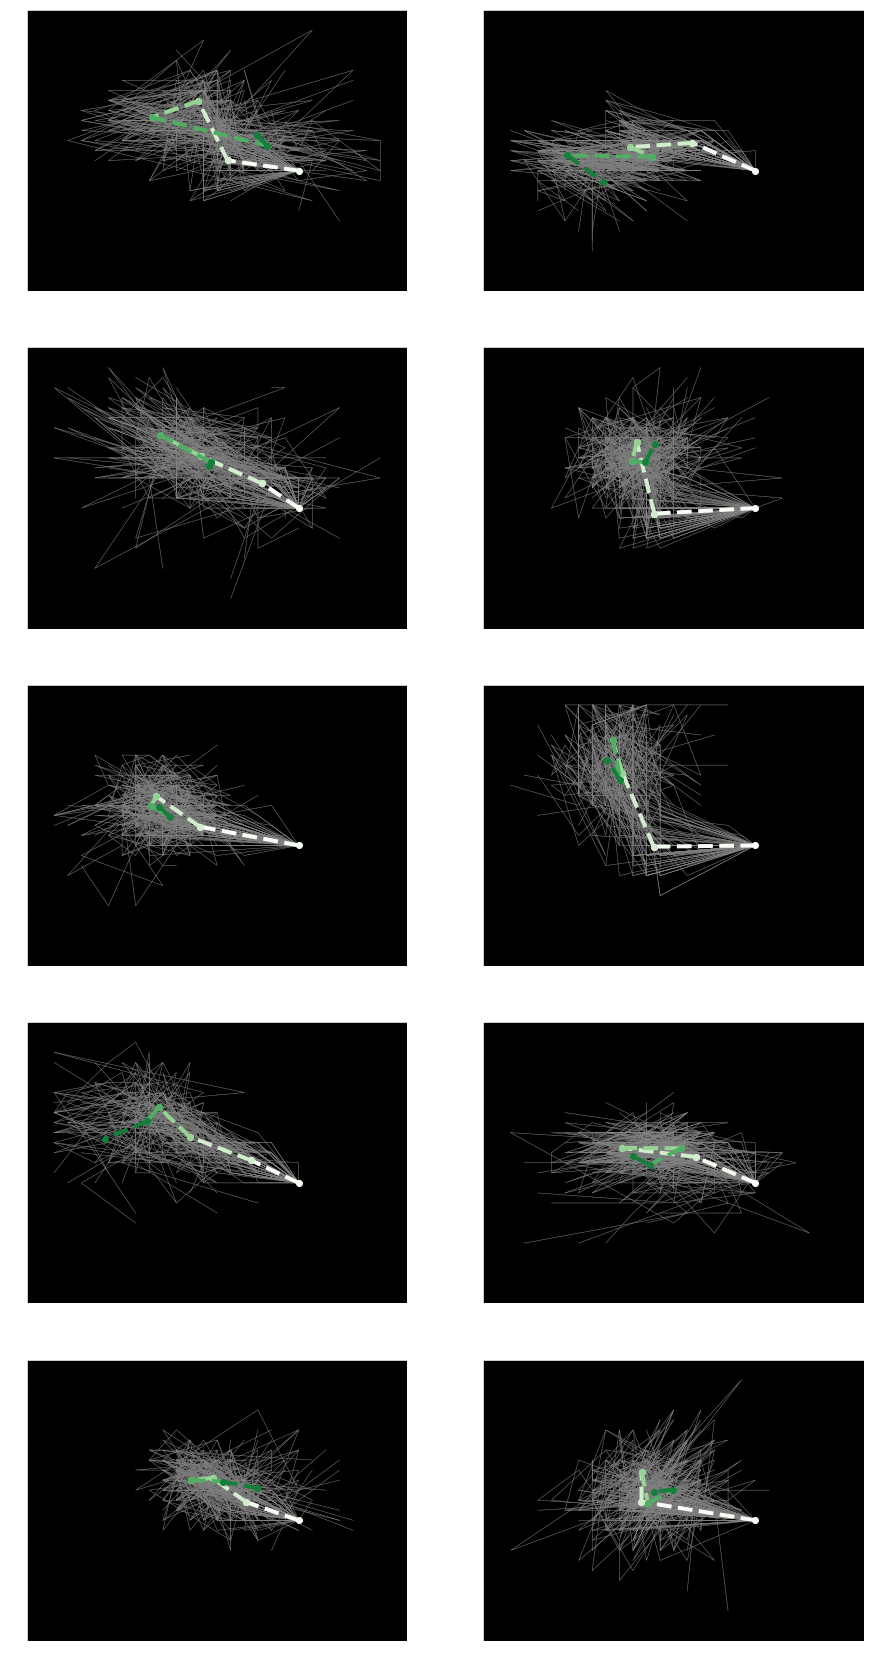

In [55]:
fig, ax = plt.subplots(5, 2)
fig.set_size_inches(15,30)
ax = ax.ravel()

for digit in digits:
    fixes_this_digit = fixes_by_digit[digit]
    xx = fixes_this_digit[:,:,0]
    yy = fixes_this_digit[:,:,1]
    for x, y in zip(xx, yy):
        ax[digit].plot(x, y, color='gray', linewidth=0.5)
    xmean = xx.mean(axis=0)
    ymean = yy.mean(axis=0)
    xy = np.stack([xmean, ymean], axis=1)
    for ind, (start, stop) in enumerate(zip(xy[:-1], xy[1:])):
        x, y = zip(start, stop)
        ax[digit].plot(x, y, color=fixation_cmap(ind), 
                       linewidth=4, linestyle='--', marker='o')
    ax[digit].set_xlim([0, 28])
    ax[digit].set_ylim([0, 28])
    ax[digit].set_xlabel(f'digit = {digit}')